In [1]:
import numpy as np

import matplotlib.pyplot as plt
import sys

sys.path.append("../")
sys.path.append("../../")

from continous_tf import Continous_TF

from falling_factorial_gen import Falling_Factorial_Basis

from adaptive_tf import adaptive_tf
from cv_tf import cross_validation
from matrix_algorithms.difference_matrix import Difference_Matrix


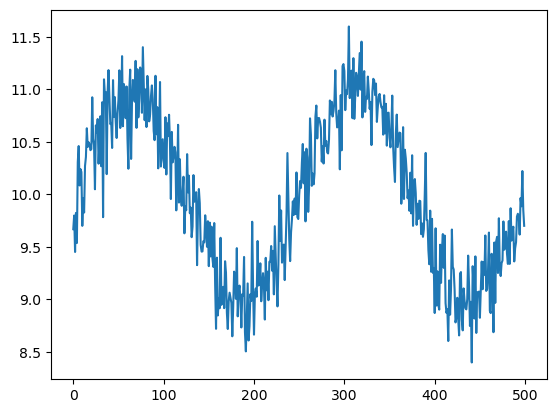

In [2]:
noisy_signal =np.sin(2*np.linspace(0, 2 * np.pi, 500)) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Prep Adaptive TF Problem

In [3]:
D=Difference_Matrix(500,1)


### Note when the optimal solution is too nosiy (not near kth order polynomial) the falling factorial basis will not be a strong contender

Performing  0 out of 1 iterations of cross validation
Performing cross validation for lambda = 0.002273069476385082
OOS Prediction Error for 1e-06 is 7.889395347825609
Performing cross validation for lambda = 0.006097953926676951
OOS Prediction Error for 2.6826957952797274e-06 is 7.275459517689417
Performing cross validation for lambda = 0.016358955358905726
OOS Prediction Error for 7.196856730011514e-06 is 5.841291476927028
Performing cross validation for lambda = 0.043886100756505154
OOS Prediction Error for 1.9306977288832496e-05 is 2.547280871910525
Performing cross validation for lambda = 0.11773305797069883
OOS Prediction Error for 5.1794746792312125e-05 is 1.0179923271245714
Performing cross validation for lambda = 0.3158419795834178
OOS Prediction Error for 0.00013894954943731373 is 0.2372239580099057
Performing cross validation for lambda = 0.8473079506012595
OOS Prediction Error for 0.0003727593720314938 is 0.07257360493173899
Performing cross validation for lambda = 2.273069

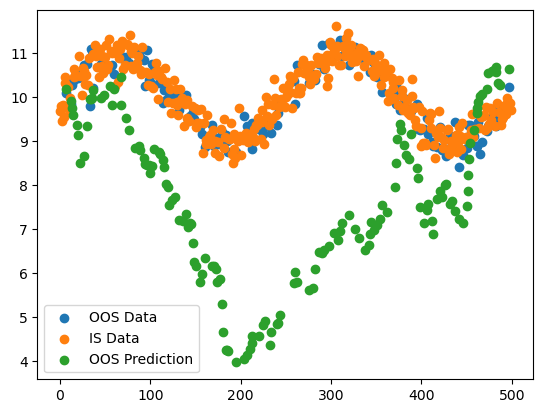

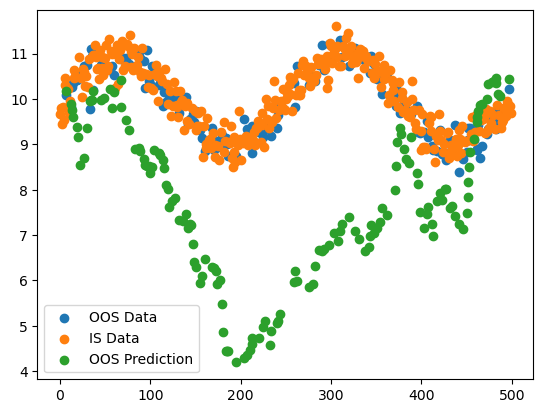

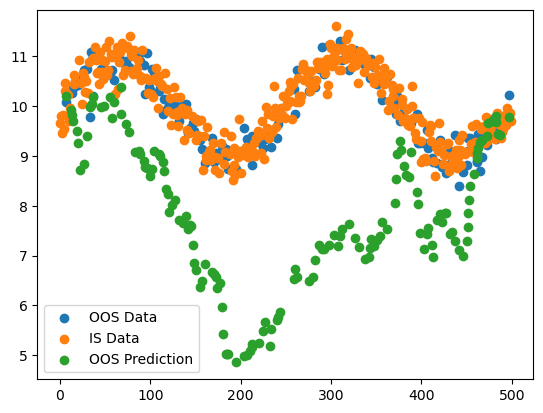

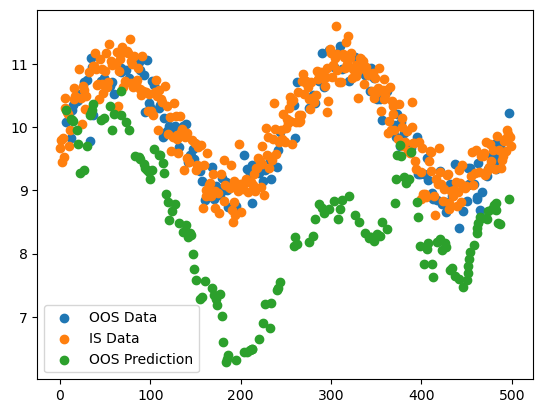

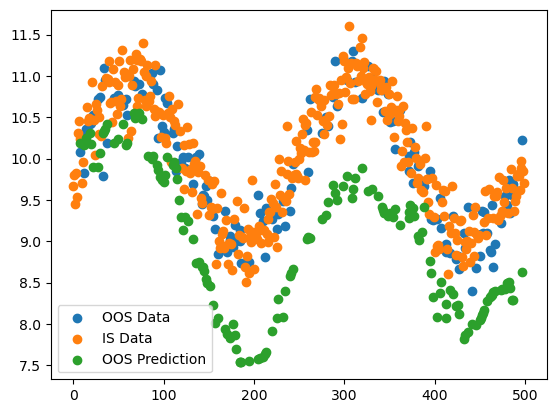

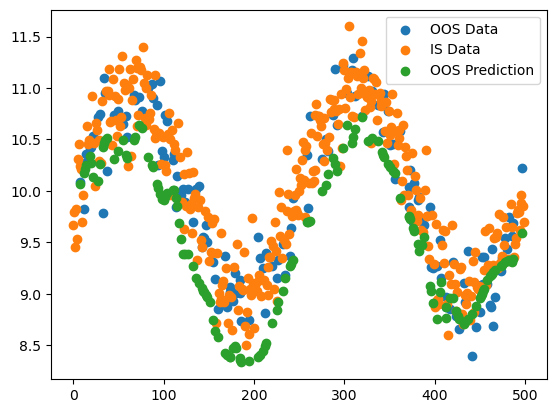

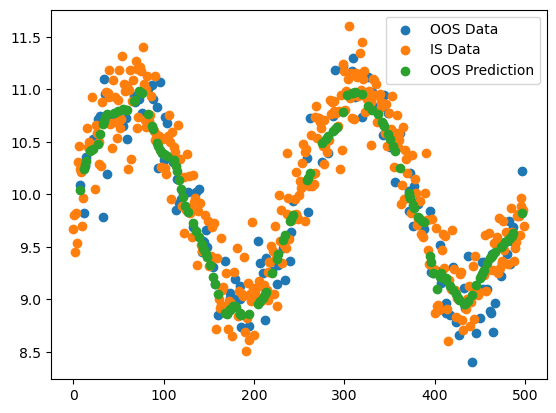

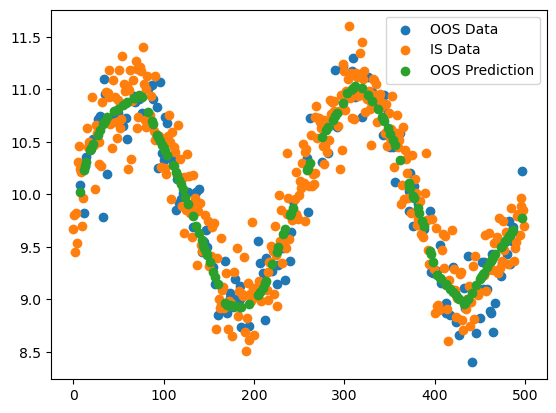

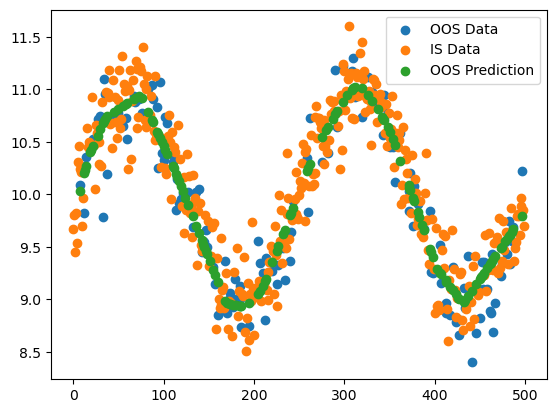

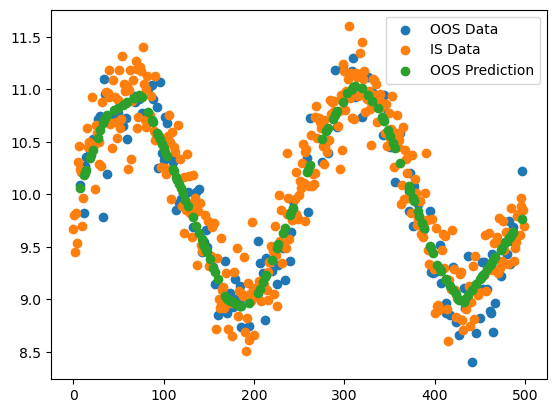

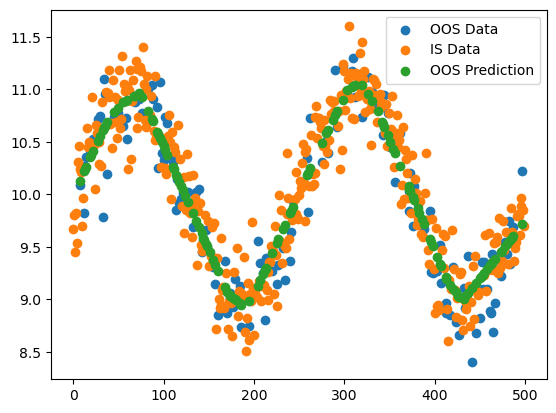

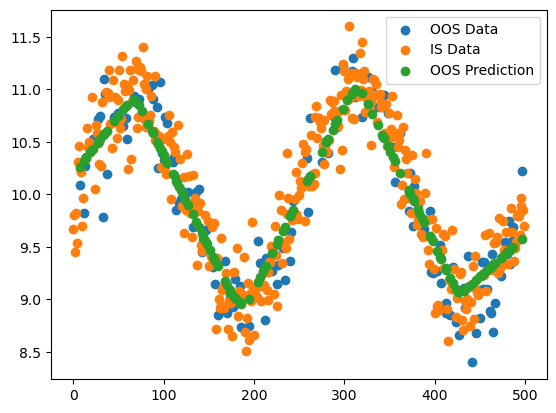

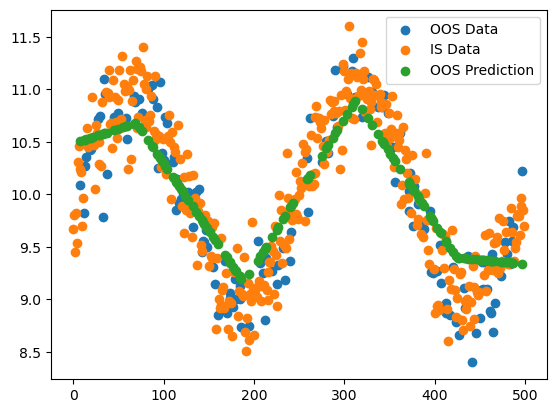

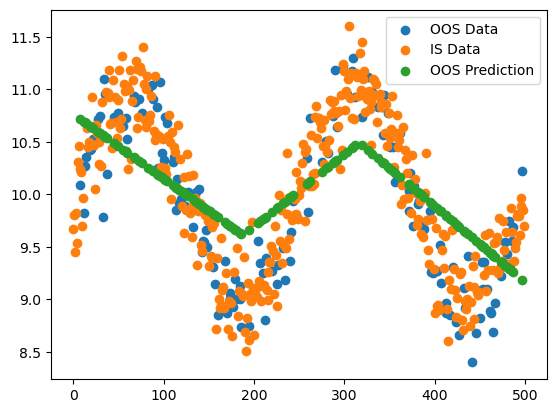

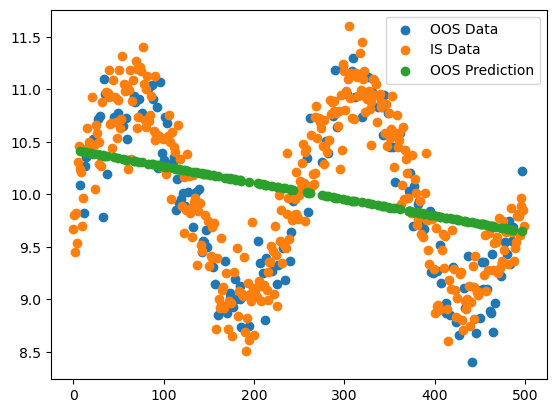

In [4]:
best_lambda=cross_validation(noisy_signal.reshape(-1,1),D,cv_folds=15,cv_iterations=1)

In [5]:
results=adaptive_tf(noisy_signal.reshape(-1,1),D,lambda_p=best_lambda)

### Let's Visualize results

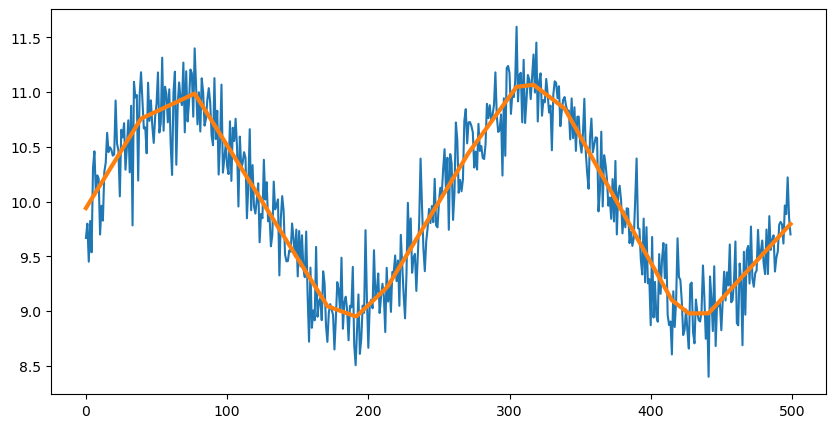

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)

### Construction of Falling Factorial Basis

In [7]:
x_tf=results["sol"].x

t=np.arange(1,501)
ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [8]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [9]:
ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[9.94129854]
 [0.02094381]]
Number of theta coefficients: 498
Theta coefficients: [[-1.61826108e-12]
 [-4.20286028e-12]
 [-9.98845451e-12]
 [-1.69961822e-11]
 [-2.74535950e-11]
 [-3.69180242e-11]
 [-4.42046399e-11]
 [-5.21094279e-11]
 [-5.95505867e-11]
 [-6.68460842e-11]
 [-7.98596744e-11]
 [-9.80495685e-11]
 [-1.27764466e-10]
 [-1.68693504e-10]
 [-2.26927810e-10]
 [-2.97816882e-10]
 [-3.96225275e-10]
 [-5.30921085e-10]
 [-7.24146076e-10]
 [-1.05167075e-09]
 [-1.72423320e-09]
 [-1.76238046e-09]
 [-1.56659929e-09]
 [-1.35244882e-09]
 [-1.72078174e-09]
 [-1.82341786e-09]
 [-1.71949388e-09]
 [-1.32853373e-09]
 [-1.29970879e-09]
 [-1.32973987e-09]
 [-1.17734089e-09]
 [-1.36411771e-09]
 [-1.26312116e-09]
 [-3.36068062e-09]
 [-1.05199387e-08]
 [-1.46009320e-08]
 [-4.59630556e-09]
 [-2.77169576e-08]
 [-1.49125484e-02]
 [-4.32875957e-09]
 [-1.74587456e-09]
 [-1.16879839e-09]
 [-9.27062871e-10]
 [-9.31578370e-10]
 [-7.86654297e-10]
 [-6.98006986e

In [10]:
x_tf[0]-x_tf[1]

array([-0.02094381])

In [11]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [104.55]])

### Let's Visualize the Coefficients

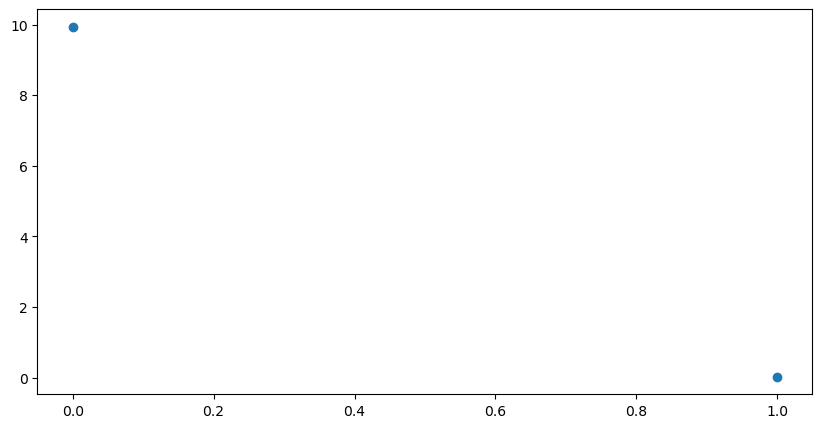

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

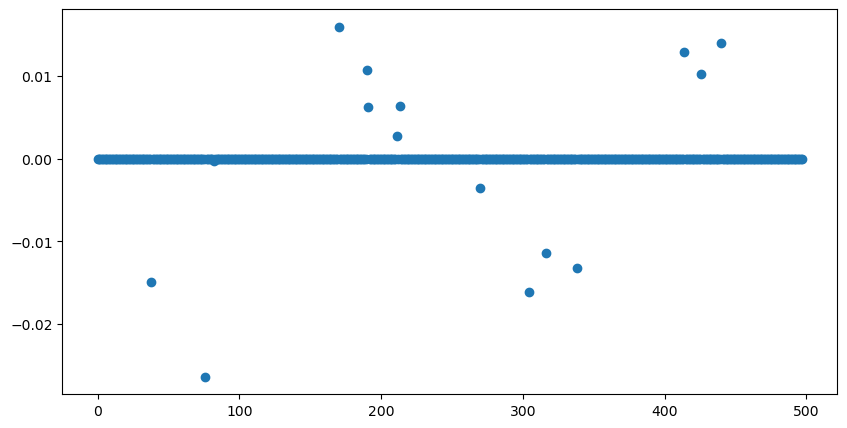

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

In [14]:
D=Difference_Matrix(500,0,t=np.arange(1,501))
D.D

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

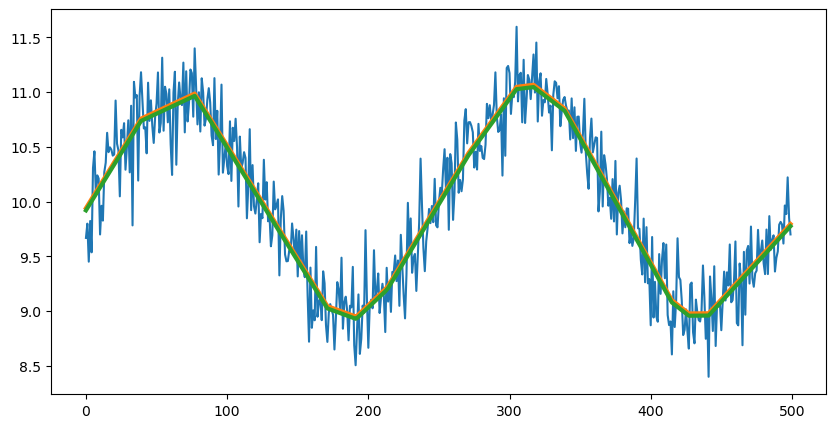

In [15]:
x_equal=np.arange(0,500)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)
